In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import sys
sys.path.append('..')

from src import utils

from os import path
import joblib

In [2]:
DATE_MODEL = '20-03-28'

DATAFOLDER_RAW = '/Users/navarmn/Work/Projects/2020-Corona/data/raw'
DATAFOLDER_COVID = path.join('COVID-19', 'csse_covid_19_data', 'csse_covid_19_time_series')

DATASET_CEARA = path.join(DATAFOLDER_RAW, 'ceara.csv')

In [3]:
df_ceara = pd.read_csv(DATASET_CEARA, index_col=0)
df_ceara.tail()

,cases,cured,deaths,refuses,suspects
data,,,,,
24/03/2020,185,0,0,0,0
25/03/2020,211,0,0,0,0
26/03/2020,235,0,3,0,0
27/03/2020,282,0,3,0,0
28/03/2020,314,0,4,0,0


In [4]:
model_linreg = joblib.load(path.join('..', 'models', 'model-{}-linear-polynomial-0.1.pkl'.format(DATE_MODEL)))

In [5]:
X = np.array(utils.count_days(date_string='%m-%d-%Y')).reshape(-1,1)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17]])

In [6]:
y = df_ceara['cases']
y = utils.get_labels(y).reshape(-1,1)
y

array([[  3],
       [  5],
       [  9],
       [ 11],
       [ 20],
       [ 24],
       [ 68],
       [ 68],
       [ 84],
       [125],
       [164],
       [185],
       [211],
       [235],
       [282],
       [314]])

In [7]:
X_fake = np.arange(1, 30, 1).reshape(-1,1)
X_fake

y_hat = model_linreg.predict(X_fake)

In [8]:
X.shape
y.shape

(16, 1)

In [9]:
def func(x):
    return x**1.02 + 1.0*x + 0


def func_down(x):
    return x**0.5 + 0.5*x + 0

ValueError: x and y must have same first dimension, but have shapes (17, 1) and (16, 1)

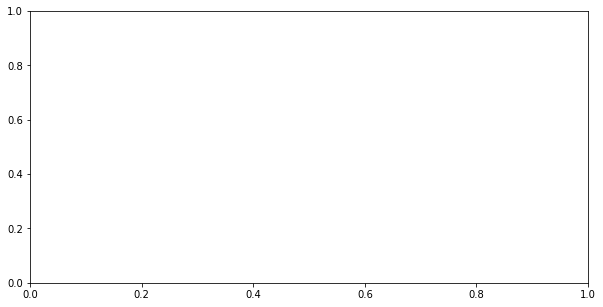

In [10]:
# %matplotlib qt
plt.figure(figsize=(10,5))

plt.plot(X, y, linewidth=5)
plt.plot(X_fake, y_hat, 'black')
plt.plot(X_fake, func(y_hat), 'red')
plt.plot(X_fake, func_down(y_hat), 'green')

plt.axis([0, 30, 0, 600])

# Generate noisy data for develop the worst and best cas scenario model

In [11]:
X.shape

(17, 1)

In [12]:
arr = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]

elements = np.random.normal(loc=y[10], scale=100, size=100)

mean = 100
sd = np.std(elements, axis=0)

final_list = [x for x in elements.tolist() if (x > mean) and  (x > 2 * sd) and (x > 0)]
# final_list = [x for x in final_list if (x < mean + 2 * sd)]
print(final_list)

[259.51248048771913, 230.9435105825414, 270.7513552816641, 331.0208698911129, 275.7051000676923, 309.95938307351526, 294.52431203927904, 258.34902227636337, 341.9995461752841, 358.71464743901595, 433.45666847670253, 339.8376888566508, 244.95889118093467, 430.73788739082516, 266.47464130588537, 234.09234220767289, 363.2879028716744, 272.4815037023873, 345.15572260932163, 234.20814254647348, 227.753772023831, 335.2521432331036, 286.9871399009583, 311.6386966985867, 329.6610725431959, 231.4953760015103, 296.9268859093021, 245.21389674411893, 231.8227121613213, 262.3541799185121, 231.7265577167486, 326.41506841886564, 247.23127469314596, 359.33525945717867, 237.0933254825199, 239.41434719313912, 234.021179070445, 274.6584520386166, 356.63348121066815]


In [13]:
def populate_list(lista, idx):
    
    buffer = [x for x in range(len(lista))]
    for u in range(0, len(lista)):
            buffer[u] = idx
            
    return buffer
    

def generate_random_noise(X, y, scale=50, size=1000):
    x_upper = []
    x_bottom = []
    y_bottom = []
    y_upper = []
    
    idx = 1
    
    for num in y:
        print(num)
        elements = np.random.normal(loc=num, scale=scale, size=size)
        
        mean = num
        sd = np.std(elements, axis=0)
        print(sd)

        final_list_upper = [x for x in elements.tolist() if (x > mean) and  (x > 4 * sd) and (x > 0)]
#         print(final_list_upper)
        final_list_bottom = [x for x in elements.tolist() if (x < mean) and  (x < 1 * sd) and (x > 0)]
        
        buffer = populate_list(final_list_upper, idx)
        x_upper = x_upper +  buffer
        
        buffer = populate_list(final_list_bottom, idx)
        x_bottom = x_bottom +  buffer
        
        y_upper = y_upper + [u for u in final_list_upper]
        y_bottom = y_bottom + [u for u in final_list_bottom]
        
        idx += 1
        
    return np.array(x_upper), np.array(x_bottom), np.array(y_upper), np.array(y_bottom)


In [14]:
x_gen_upper, x_gen_bottom, y_upper, y_bottom = generate_random_noise(X, y)

[3]
48.92622237044673
[5]
50.10326118515312
[9]
51.836247116262285
[11]
49.62086958342273
[20]
48.755039973367005
[24]
50.36921764169554
[68]
47.42407529632653
[68]
49.77447444783667
[84]
50.576633611469774
[125]
48.89080475244774
[164]
48.09216117551871
[185]
48.51840093777174
[211]
50.497164586266095
[235]
50.256602126372506
[282]
49.499103293807174
[314]
52.20846861280691


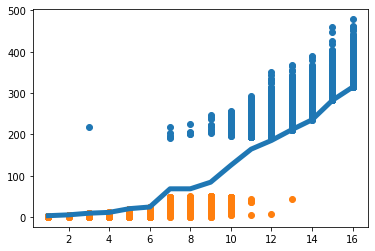

In [15]:
plt.scatter(x_gen_upper, y_upper)
plt.scatter(x_gen_bottom, y_bottom)
plt.plot(X, y, linewidth=5)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=4)

model_linreg = LinearRegression()
model_lin_upper = Pipeline([
                ('polynomial-features', PolynomialFeatures(degree=10)),
                ('regressor', LinearRegression())
                ])

model_lin_bottom = Pipeline([
                ('polynomial-features', PolynomialFeatures(degree=10)),
                ('regressor', LinearRegression())
                ])

In [19]:
y_loko
model_lin_upper = model_lin_upper.fit(X, y_loko)

NameError: name 'y_loko' is not defined

In [20]:
# model_lin_upper = model_lin_upper.fit(x_gen_upper.reshape(-1,1), y_upper)
model_lin_bottom = model_lin_bottom.fit(x_gen_bottom.reshape(-1,1), y_bottom)

In [21]:
y_hat_upper = model_lin_upper.predict(X_fake)
y_hat_bottom = model_lin_bottom.predict(X_fake)

NotFittedError: This PolynomialFeatures instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

ValueError: x and y must have same first dimension, but have shapes (16, 1) and (29, 1)

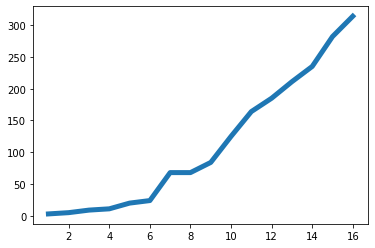

In [22]:
plt.plot(X, y, linewidth=5)
plt.plot(X, y_hat, 'yellow')
plt.plot(X_fake, y_hat, 'red')
plt.plot(X_fake, y_hat_bottom, 'green')
plt.axis([0, 30, 0, 700])

## with MLP

In [23]:
mlp = MLPRegressor(hidden_layer_sizes=(5, 5,), activation='tanh').fit(X, y)

/Users/navarmn/Work/Projects/venvs/data-science/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/navarmn/Work/Projects/venvs/data-science/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
y_hat_mlp = mlp.predict(X_fake)

(0.0, 30.0, 0.0, 700.0)

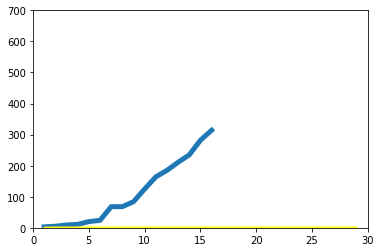

In [25]:
plt.plot(X, y, linewidth=5)
plt.plot(X_fake, y_hat_mlp, 'yellow')
# plt.plot(X_fake, y_hat_upper, 'red')
# plt.plot(X_fake, y_hat_bottom, 'green')
plt.axis([0, 30, 0, 700])

# Idea: use others countries

In [15]:
DATAFOLDER_PROCESSED = '/Users/navarmn/Work/Projects/2020-Corona/data/processed'
DATA_WORLD = 'time_series_19-covid-Confirmed-processed-03-28-20.csv'.format(DATE_MODEL)

In [16]:
data_world = pd.read_csv(path.join(DATAFOLDER_PROCESSED, DATA_WORLD), index_col=0)
data_world.tail()

,day,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
03/24/20,63,74,123,264,164,3,3,387,249,2044,...,97,248,8164,162,50,84,134,59,3,3
03/25/20,64,84,146,302,188,3,3,387,265,2364,...,145,333,9640,189,60,91,141,59,12,3
03/26/20,65,94,174,367,224,4,7,502,290,2810,...,196,333,11812,217,75,107,153,84,16,3
03/27/20,66,110,186,409,267,4,7,589,329,3143,...,310,405,14745,238,88,107,163,91,22,5
03/28/20,67,110,197,454,308,5,7,690,407,3640,...,356,468,17312,274,104,119,174,98,28,7


In [17]:
def get_x_y_by_country(data_world, country='Italy'):
    data = data_world[country].loc[data_world[country] != 0]
    y = data.values
    X = np.array(utils.count_days(dayone=data.index[0], date_string='%m/%d/%y')).reshape(-1,1)
    
    return X[:-1], y

### Good countrys

In [18]:
good_countries = ['China']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)

ValueError: x and y must have same first dimension, but have shapes (68, 1) and (67,)

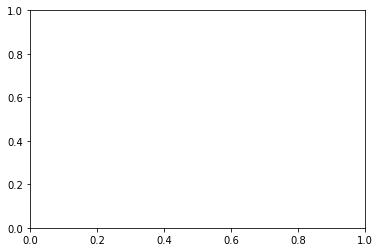

In [19]:
plt.plot(X, y)

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [73]:
tf = MaxAbsScaler()

In [74]:
# y_std = tf.fit_transform(y.reshape(-1,1))
y_std = (y/1.386e9).reshape(-1,1)

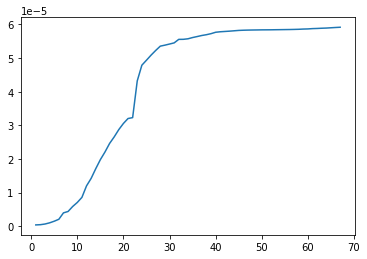

In [75]:
plt.plot(X, y_std)

In [76]:
model_good_thai = Pipeline([
                ('polynomial-features', PolynomialFeatures(degree=4)),
                ('regressor', LinearRegression())
                ])

In [77]:
model_good_thai.fit(X, y_std)

Pipeline(memory=None,
         steps=[('polynomial-features',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [78]:
X_fake = np.arange(1, 70, 1).reshape(-1,1)

In [79]:
y_hat_tf = model_good_thai.predict(X_fake)
y_hat = y_hat_tf*1.386e9

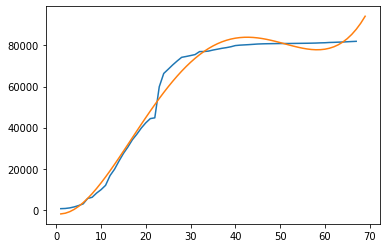

In [80]:
plt.plot(X, y)
plt.plot(X_fake, y_hat)

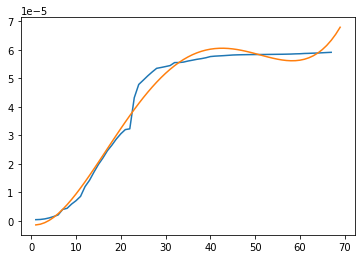

In [81]:
plt.plot(X, y_std)
plt.plot(X_fake, y_hat_tf)

In [82]:
df_ceara = pd.read_csv(DATASET_CEARA, index_col=0)
df_ceara.tail()

,cases,cured,deaths,refuses,suspects
data,,,,,
24/03/2020,185,0,0,0,0
25/03/2020,211,0,0,0,0
26/03/2020,235,0,3,0,0
27/03/2020,282,0,3,0,0
28/03/2020,314,0,4,0,0


In [83]:
X_ceara = np.array(utils.count_days(date_string='%m-%d-%Y')).reshape(-1,1)
y_ceara = df_ceara['cases']
y_ceara = utils.get_labels(y_ceara).reshape(-1,1)

In [84]:
y_ceara

array([[  3],
       [  5],
       [  9],
       [ 11],
       [ 20],
       [ 24],
       [ 68],
       [ 68],
       [ 84],
       [125],
       [164],
       [185],
       [211],
       [235],
       [282],
       [314]])

In [85]:
tf_ceara = MaxAbsScaler()
y_ceara_tf = tf_ceara.fit_transform(y_ceara)

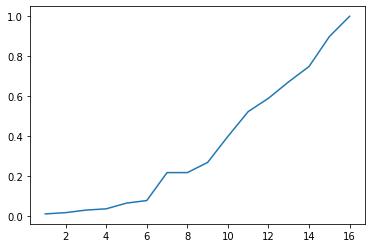

In [86]:
plt.plot(X_ceara, y_ceara_tf)

In [87]:
model_good_ceara = Pipeline([
                ('polynomial-features', PolynomialFeatures(degree=4)),
                ('regressor', LinearRegression())
                ])

model_good_ceara.fit(X_ceara, y_ceara_tf)

Pipeline(memory=None,
         steps=[('polynomial-features',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

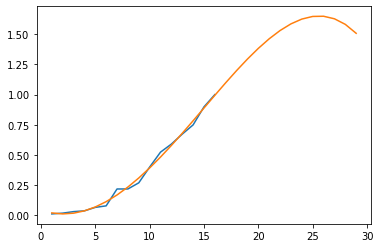

In [88]:
X_fake = np.arange(1, 30, 1).reshape(-1,1)
y_hat_tf = model_good_ceara.predict(X_fake)
# y_hat = tf_ceara.inverse_transform(y_hat_tf)

plt.plot(X_ceara, y_ceara_tf)
plt.plot(X_fake, y_hat_tf)

# Use the model trained in others country to cera

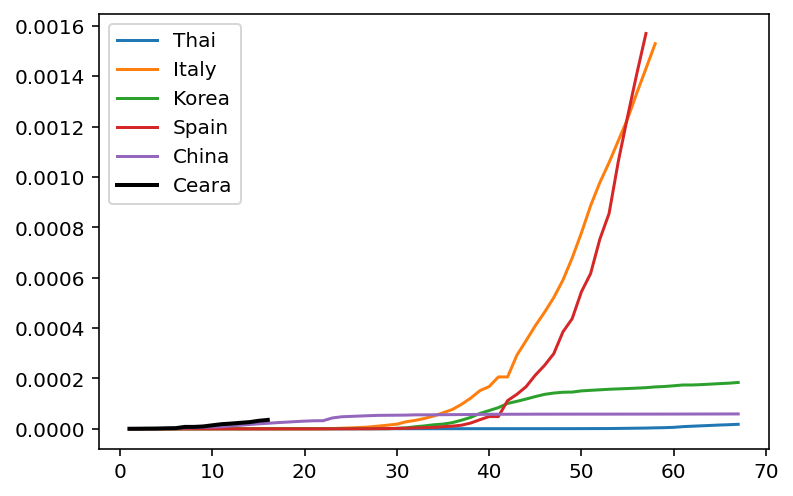

In [109]:
%matplotlib qt

good_countries = ['Thailand']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)
    
y_std = (y/69.04e6).reshape(-1,1)

plt.plot(X, y_std)

good_countries = ['Italy']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)

y_std = (y/60.48e6).reshape(-1,1)
    
plt.plot(X, y_std)

good_countries = ['Korea, South']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)
    
y_std = (y/51.47e6).reshape(-1,1)

plt.plot(X, y_std)


good_countries = ['Spain']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)
    
y_std = (y/46.66e6).reshape(-1,1)

plt.plot(X, y_std)

good_countries = ['China']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)
    
y_std = (y/1.386e9).reshape(-1,1)

plt.plot(X, y_std)


plt.plot(X_ceara, y_ceara/8.843e6, 'black', linewidth=2)

plt.legend(['Thai', 'Italy', 'Korea', 'Spain', 'China', 'Ceara'])

In [ ]:
good_countries = ['Korea, South']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)
    
y_std = (y/69.04e6).reshape(-1,1)

model_good_thai = Pipeline([
                ('polynomial-features', PolynomialFeatures(degree=4)),
                ('regressor', LinearRegression())
                ])

model_good_thai.fit(X, y_std)

In [90]:
good_countries = ['Thailand']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)
    
y_std = (y/69.04e6).reshape(-1,1)

model_good_thai = Pipeline([
                ('polynomial-features', PolynomialFeatures(degree=4)),
                ('regressor', LinearRegression())
                ])

model_good_thai.fit(X, y_std)

Pipeline(memory=None,
         steps=[('polynomial-features',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [91]:
good_countries = ['Italy']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)
    
y_std = (y/60.48e6).reshape(-1,1)

model_good_italy = Pipeline([
                ('polynomial-features', PolynomialFeatures(degree=4)),
                ('regressor', LinearRegression())
                ])

model_good_italy.fit(X, y_std)

Pipeline(memory=None,
         steps=[('polynomial-features',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [92]:
good_countries = ['Korea, South']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)
    
y_std = (y/51.47e6).reshape(-1,1)

model_good_korea = Pipeline([
                ('polynomial-features', PolynomialFeatures(degree=4)),
                ('regressor', LinearRegression())
                ])

model_good_korea.fit(X, y_std)

Pipeline(memory=None,
         steps=[('polynomial-features',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [93]:
good_countries = ['Spain']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)
    
y_std = (y/46.66e6).reshape(-1,1)

model_good_spain = Pipeline([
                ('polynomial-features', PolynomialFeatures(degree=4)),
                ('regressor', LinearRegression())
                ])

model_good_spain.fit(X, y_std)

Pipeline(memory=None,
         steps=[('polynomial-features',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [94]:
X_fake = np.arange(1, 50, 1).reshape(-1,1)

y_hat_china_ceara_tf = model_good_china.predict(X_fake)
y_hat_thai_ceara_tf = model_good_thai.predict(X_fake)
y_hat_korea_ceara_tf = model_good_korea.predict(X_fake)
y_hat_italy_ceara_tf = model_good_italy.predict(X_fake)
y_hat_spain_ceara_tf = model_good_spain.predict(X_fake)

In [95]:
# y_hat_thai_ceara = tf_ceara.inverse_transform(y_hat_thai_ceara_tf)
y_hat_china_ceara_tf = y_hat_china_ceara_tf*8.843e6
y_hat_thai_ceara = y_hat_thai_ceara_tf*8.843e6
y_hat_italy_ceara_tf = y_hat_italy_ceara_tf*8.843e6
y_hat_spain_ceara_tf = y_hat_spain_ceara_tf*8.843e6
y_hat_korea_ceara_tf = y_hat_korea_ceara_tf*8.843e6

y_hat_china_ceara_tf[y_hat_china_ceara_tf < 0] = 0
y_hat_thai_ceara[y_hat_thai_ceara < 0] = 0
y_hat_italy_ceara_tf[y_hat_italy_ceara_tf < 0] = 0
y_hat_spain_ceara_tf[y_hat_spain_ceara_tf < 0] = 0
y_hat_korea_ceara_tf[y_hat_korea_ceara_tf < 0] = 0

In [96]:
%matplotlib qt

plt.plot(X_ceara, y_ceara, 'black', linewidth=2)
plt.plot(X_fake, y_hat_china_ceara_tf)
plt.plot(X_fake, y_hat_thai_ceara)
plt.plot(X_fake, y_hat_italy_ceara_tf)
plt.plot(X_fake, y_hat_spain_ceara_tf)

plt.legend(['Ceara', 'China', 'Thai', 'Italy', 'Spain'])


In [ ]:
good_countries = ['China']
for g in good_countries:
    X, y = get_x_y_by_country(data_world, country=g)
    

In [ ]:
%matplotlib qt

plt.plot(X_ceara, y_ceara, 'black', linewidth=2)
plt.plot(X_fake, y_hat_china_ceara_tf)
plt.plot(X_fake, y_hat_thai_ceara)
plt.plot(X_fake, y_hat_italy_ceara_tf)
plt.plot(X_fake, y_hat_spain_ceara_tf)

plt.legend(['Ceara', 'China', 'Thai', 'Italy', 'Spain'])